In [1]:
#We are given the dataset about bank information of around 10000 customers and also given if they have churned or not. 
#Our task is to build a ML model such that we can predict if a customer is going to churn or not. We will also perform EDA on 
#this dataset to inform the bank on what they could do to minimise the churn and build a sustainable business. 
#We are going to use LazyClassifier which has around 29 pre-trained models which will help us find out the best model on basis of accuracy and time taken.

In [2]:
#Importing Required Libraries

In [3]:
import matplotlib as mpl
mpl.get_cachedir()
w

'C:\\Users\\Lenovo\\.matplotlib'

In [4]:
import matplotlib as mpl
import shutil
import os

cache_dir = mpl.get_cachedir()
shutil.rmtree(cache_dir)
os.makedirs(cache_dir)

In [5]:
#LazyPredict is a Python library designed to quickly and easily benchmark a variety of machine learning models on a given dataset. 
#It helps in selecting the best-performing models by providing a streamlined way to train and evaluate multiple algorithms without
#requiring extensive coding or parameter tuning. LazyPredict is particularly useful for exploratory data analysis and initial model selection
#in the early stages of a machine learning project.

In [6]:
from IPython.display import clear_output
clear_output()

In [7]:
#pip install lazypredict


In [8]:
#Importing all essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import lazypredict
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')
clear_output()

In [9]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [10]:
# Data Exploration :

#Feature Description:

#RowNumber: corresponds to the record (row) number and has no effect on the output.
#CustomerId: contains random values and has no effect on customer leaving the bank.
# Surname: the surname of a customer has no impact on their decision to leave the bank.
# CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
# Geography: a customer’s location can affect their decision to leave the bank.
# Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
# Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
# Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
# Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to 
# leave the bank compared to those with lower balances.
# NumOfProducts: refers to the number of products that a customer has purchased through the bank.
# HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
# IsActiveMember: active customers are less likely to leave the bank.
# EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
# Exited: whether or not the customer left the bank. (0=No,1=Yes)

In [11]:
data = pd.read_csv("bank churn.csv")
print(data)


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMembe

In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data.shape # tells shape to data set

(10000, 14)

In [14]:
data.dtypes #find the data types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
data.describe() #returns description of the data in the DataFrame

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [16]:
data.info() #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
data.nunique() # returns the number of unique values for each column

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [18]:
# Null Value Distribution

In [19]:
data.isnull().sum() #Calling the sum() method on the isnull() series returns the count of True values which actually corresponds to
#the number of NaN values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
# Preprocessing and Cleaning dataset

In [21]:
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
    
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [22]:
if data.duplicated().sum().sum() == 0:
    print('There is no duplicated data')
    
else:
    print('There is {} duplicated data'.format(data.duplicated().sum().sum()))

There is no duplicated data


In [23]:
#This code shows the customers of this bank dataset live in which country.
print('Geography :',data['Geography'].unique())
print('-'*40)
#This code shows how many genders contain in this dataset.
print('Gender:', data['Gender'].unique())

Geography : ['France' 'Spain' 'Germany']
----------------------------------------
Gender: ['Female' 'Male']


In [24]:
#Our customers are only from three countries:
# France
# Spain
# Germany
# Visualization

#Let's visualize the distribution of customers in these three countries.

In [25]:
# More than 50% of our customers from france

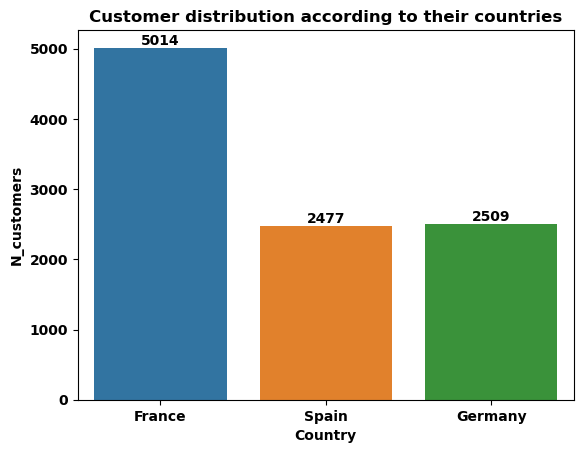

In [26]:
Country_dist = sns.countplot(data=data, x='Geography');
Country_dist.bar_label(Country_dist.containers[0]);

plt.title('Customer distribution according to their countries');
plt.xlabel('Country');
plt.ylabel('N_customers');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


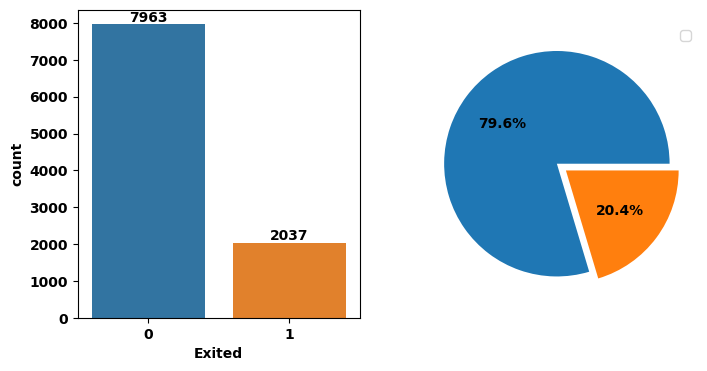

In [27]:
#This plot shows all of the customers who exited or stayed at bank.
count = data['Exited'].value_counts()
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);
ax=sns.countplot(data=data, x='Exited');
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2);
plt.pie(count.values, autopct="%1.1f%%",explode=[0,0.1]);
plt.legend();

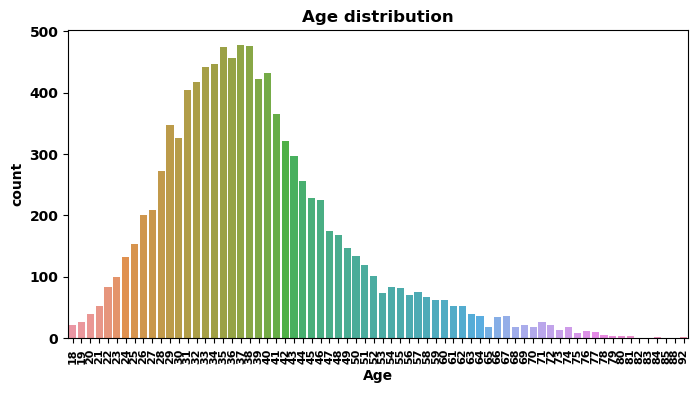

In [28]:
plt.figure(figsize=(8,4));
age_plot=sns.countplot(data=data, x='Age');
plt.xticks(rotation=90, fontsize=8);
plt.title('Age distribution');


In [29]:
# The age plot doesn't give us clear information, so we must make ranges for ages to understand more detail.
data['Age'].nunique()

70

In [30]:
unique_age = list(set(data['Age']))
unique_age.sort()

print('Unique ages: ', unique_age)

Unique ages:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 92]


In [31]:
# Feature Extraction
data['Age_range'] = pd.cut(data['Age'], [17,25,35,45,55,65,75,100], 
                           labels=['18-25','26-35', '36-45', '46-55', '56-65', '66-75','76-100'])

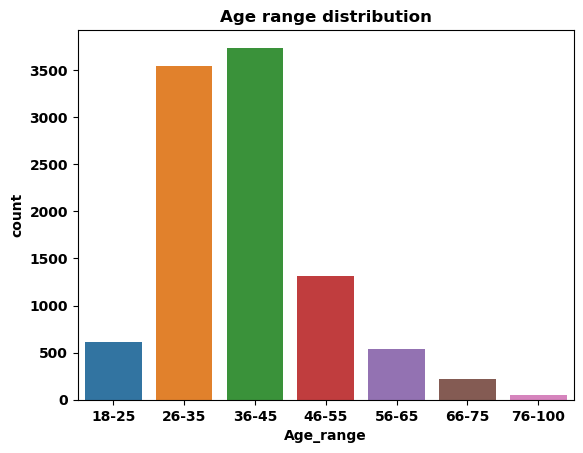

In [32]:
# THis plot shows the customers age range. 
age_range_plot=sns.countplot(data=data, x='Age_range');
plt.title('Age range distribution');

In [33]:
##Now we know most people who exited from our bank are 36-45 and 46-55.

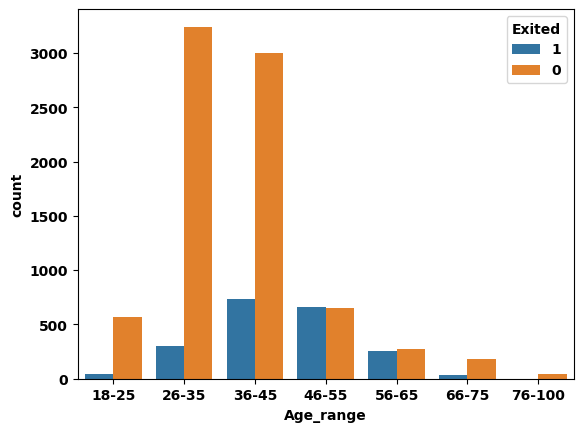

In [34]:
data['Exited'] = data['Exited'].astype(str)

# Create the countplot
age_range_exit = sns.countplot(data=data, x='Age_range', hue='Exited')

# Add labels to the bars
#age_range_exit.bar_label(age_range_exit.containers[0])
#age_range_exit.bar_label(age_range_exit.containers[1])

# Show the plot
plt.show()

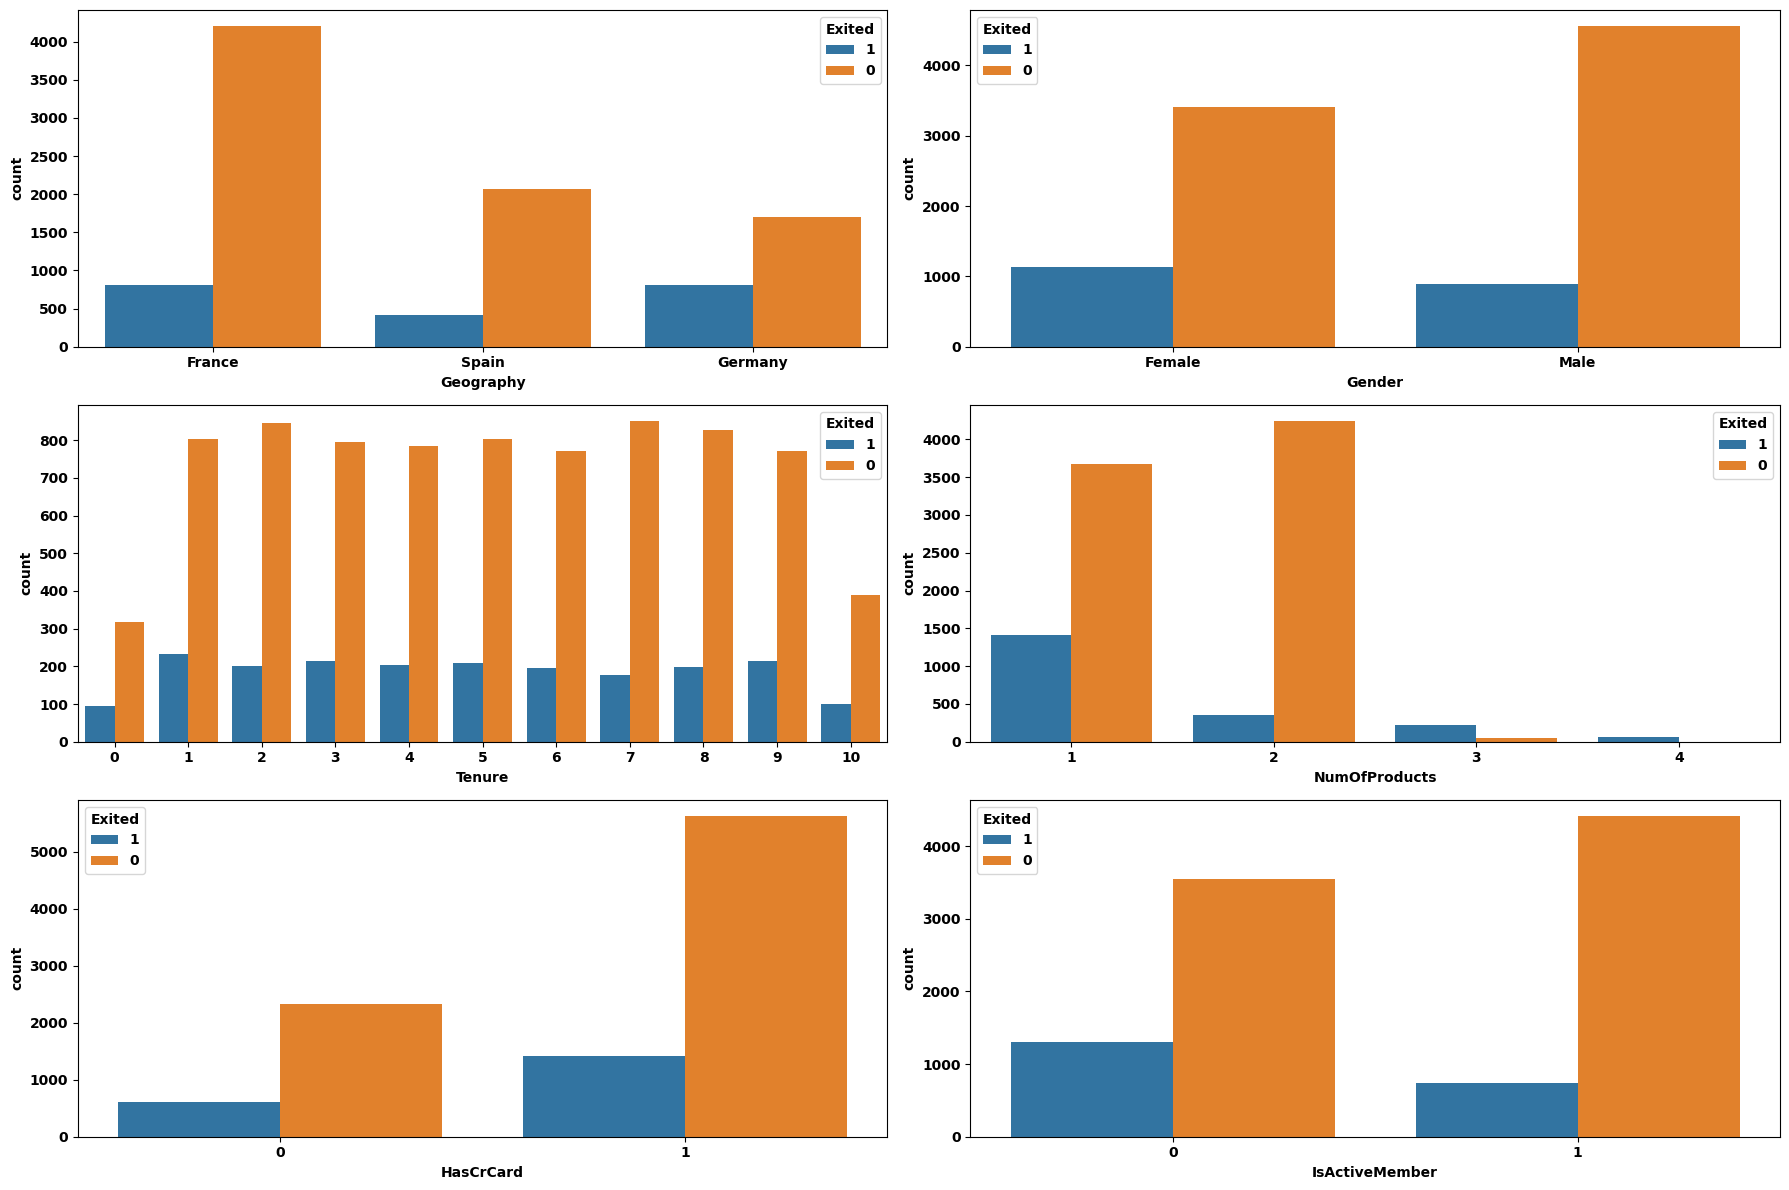

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(18, 12))

sns.countplot(x='Geography', hue='Exited', data=data, ax=ax[0, 0])
sns.countplot(x='Gender', hue='Exited', data=data, ax=ax[0, 1])
sns.countplot(x='Tenure', hue='Exited', data=data, ax=ax[1, 0])
sns.countplot(x='NumOfProducts', hue='Exited', data=data, ax=ax[1, 1])
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=ax[2, 0])
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=ax[2, 1])

# Adjust the layout
plt.tight_layout()
plt.show()


In [36]:
# Larger percentage of female customers are churning compared to male customers. \ The largest proportion of customers 
# in the dataset are from France. \ Majority of customers who churned had credit cards. \ Inactive members exhibit a higher
#churn rate

<Axes: xlabel='Age', ylabel='Count'>

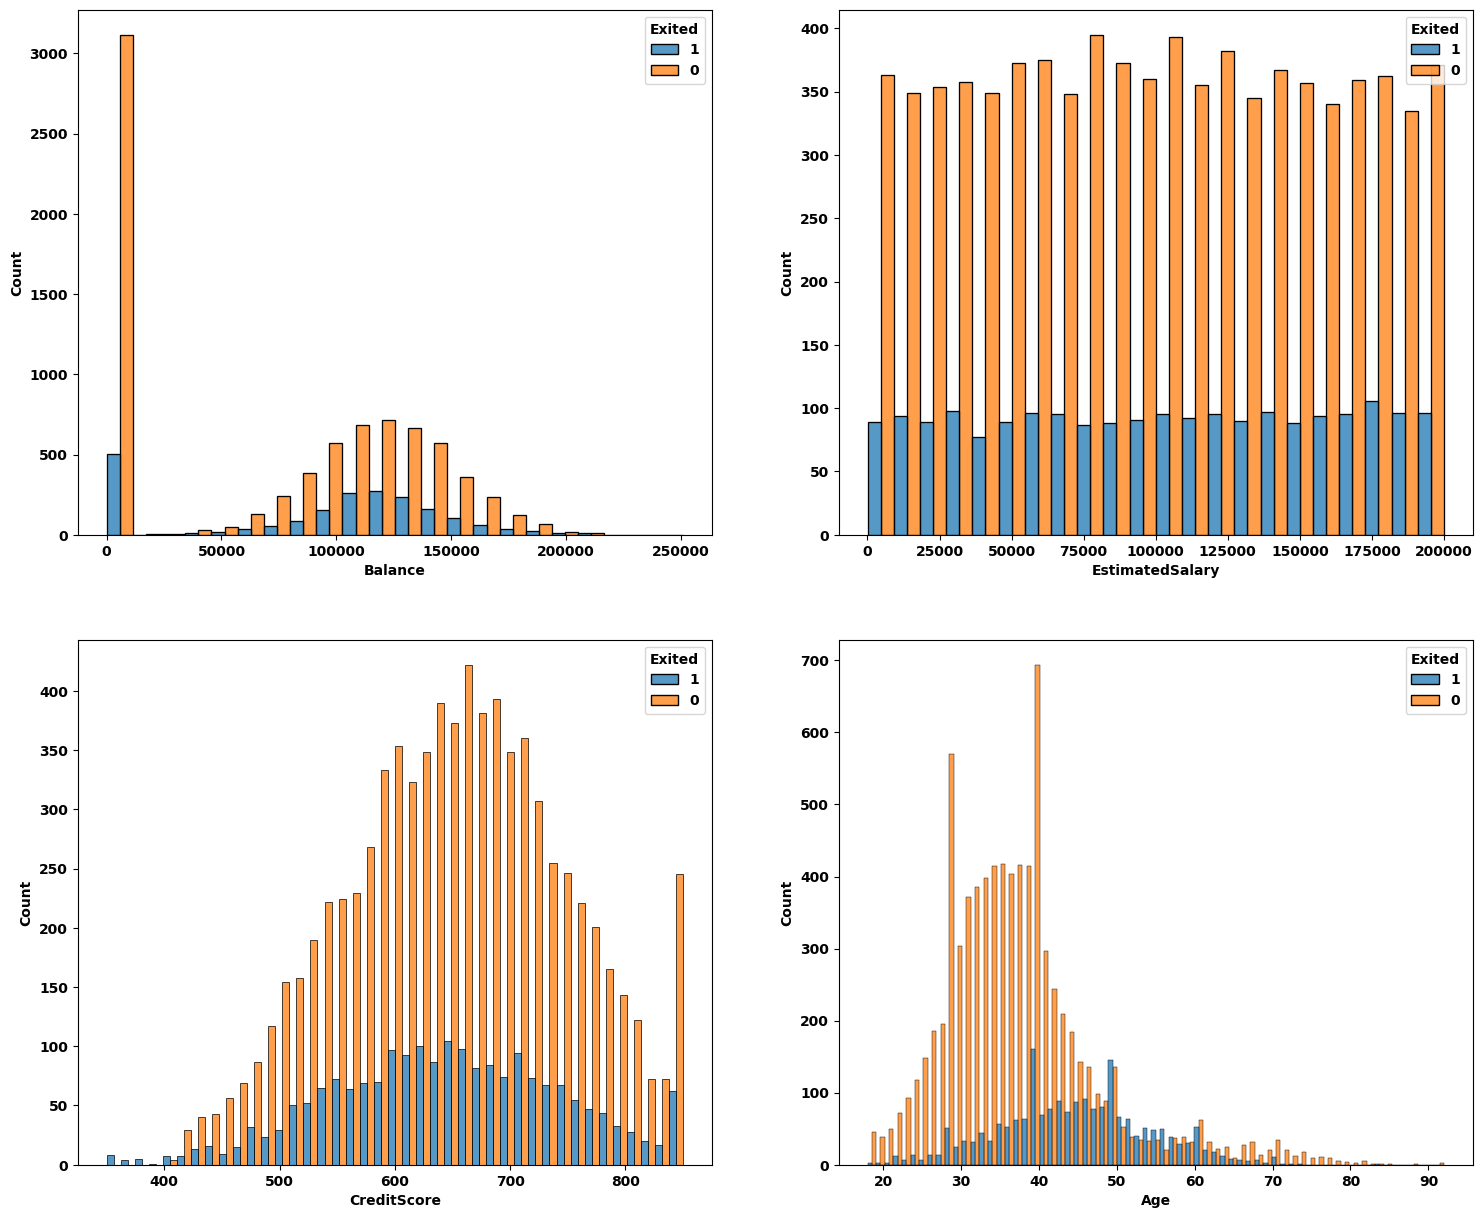

In [37]:
fig , axes = plt.subplots(2, 2, figsize = (18, 15))

sns.histplot(data=data, x='Balance', hue='Exited', ax=axes[0][0], multiple="dodge")
sns.histplot(data=data, x='EstimatedSalary', hue='Exited', ax=axes[0][1], multiple="dodge")
sns.histplot(data=data, x='CreditScore', ax=axes[1][0],  hue='Exited', multiple="dodge")
sns.histplot(data=data, x='Age', ax=axes[1][1], hue='Exited', multiple="dodge")

In [38]:
## categorical variables

<Axes: xlabel='Exited', ylabel='count'>

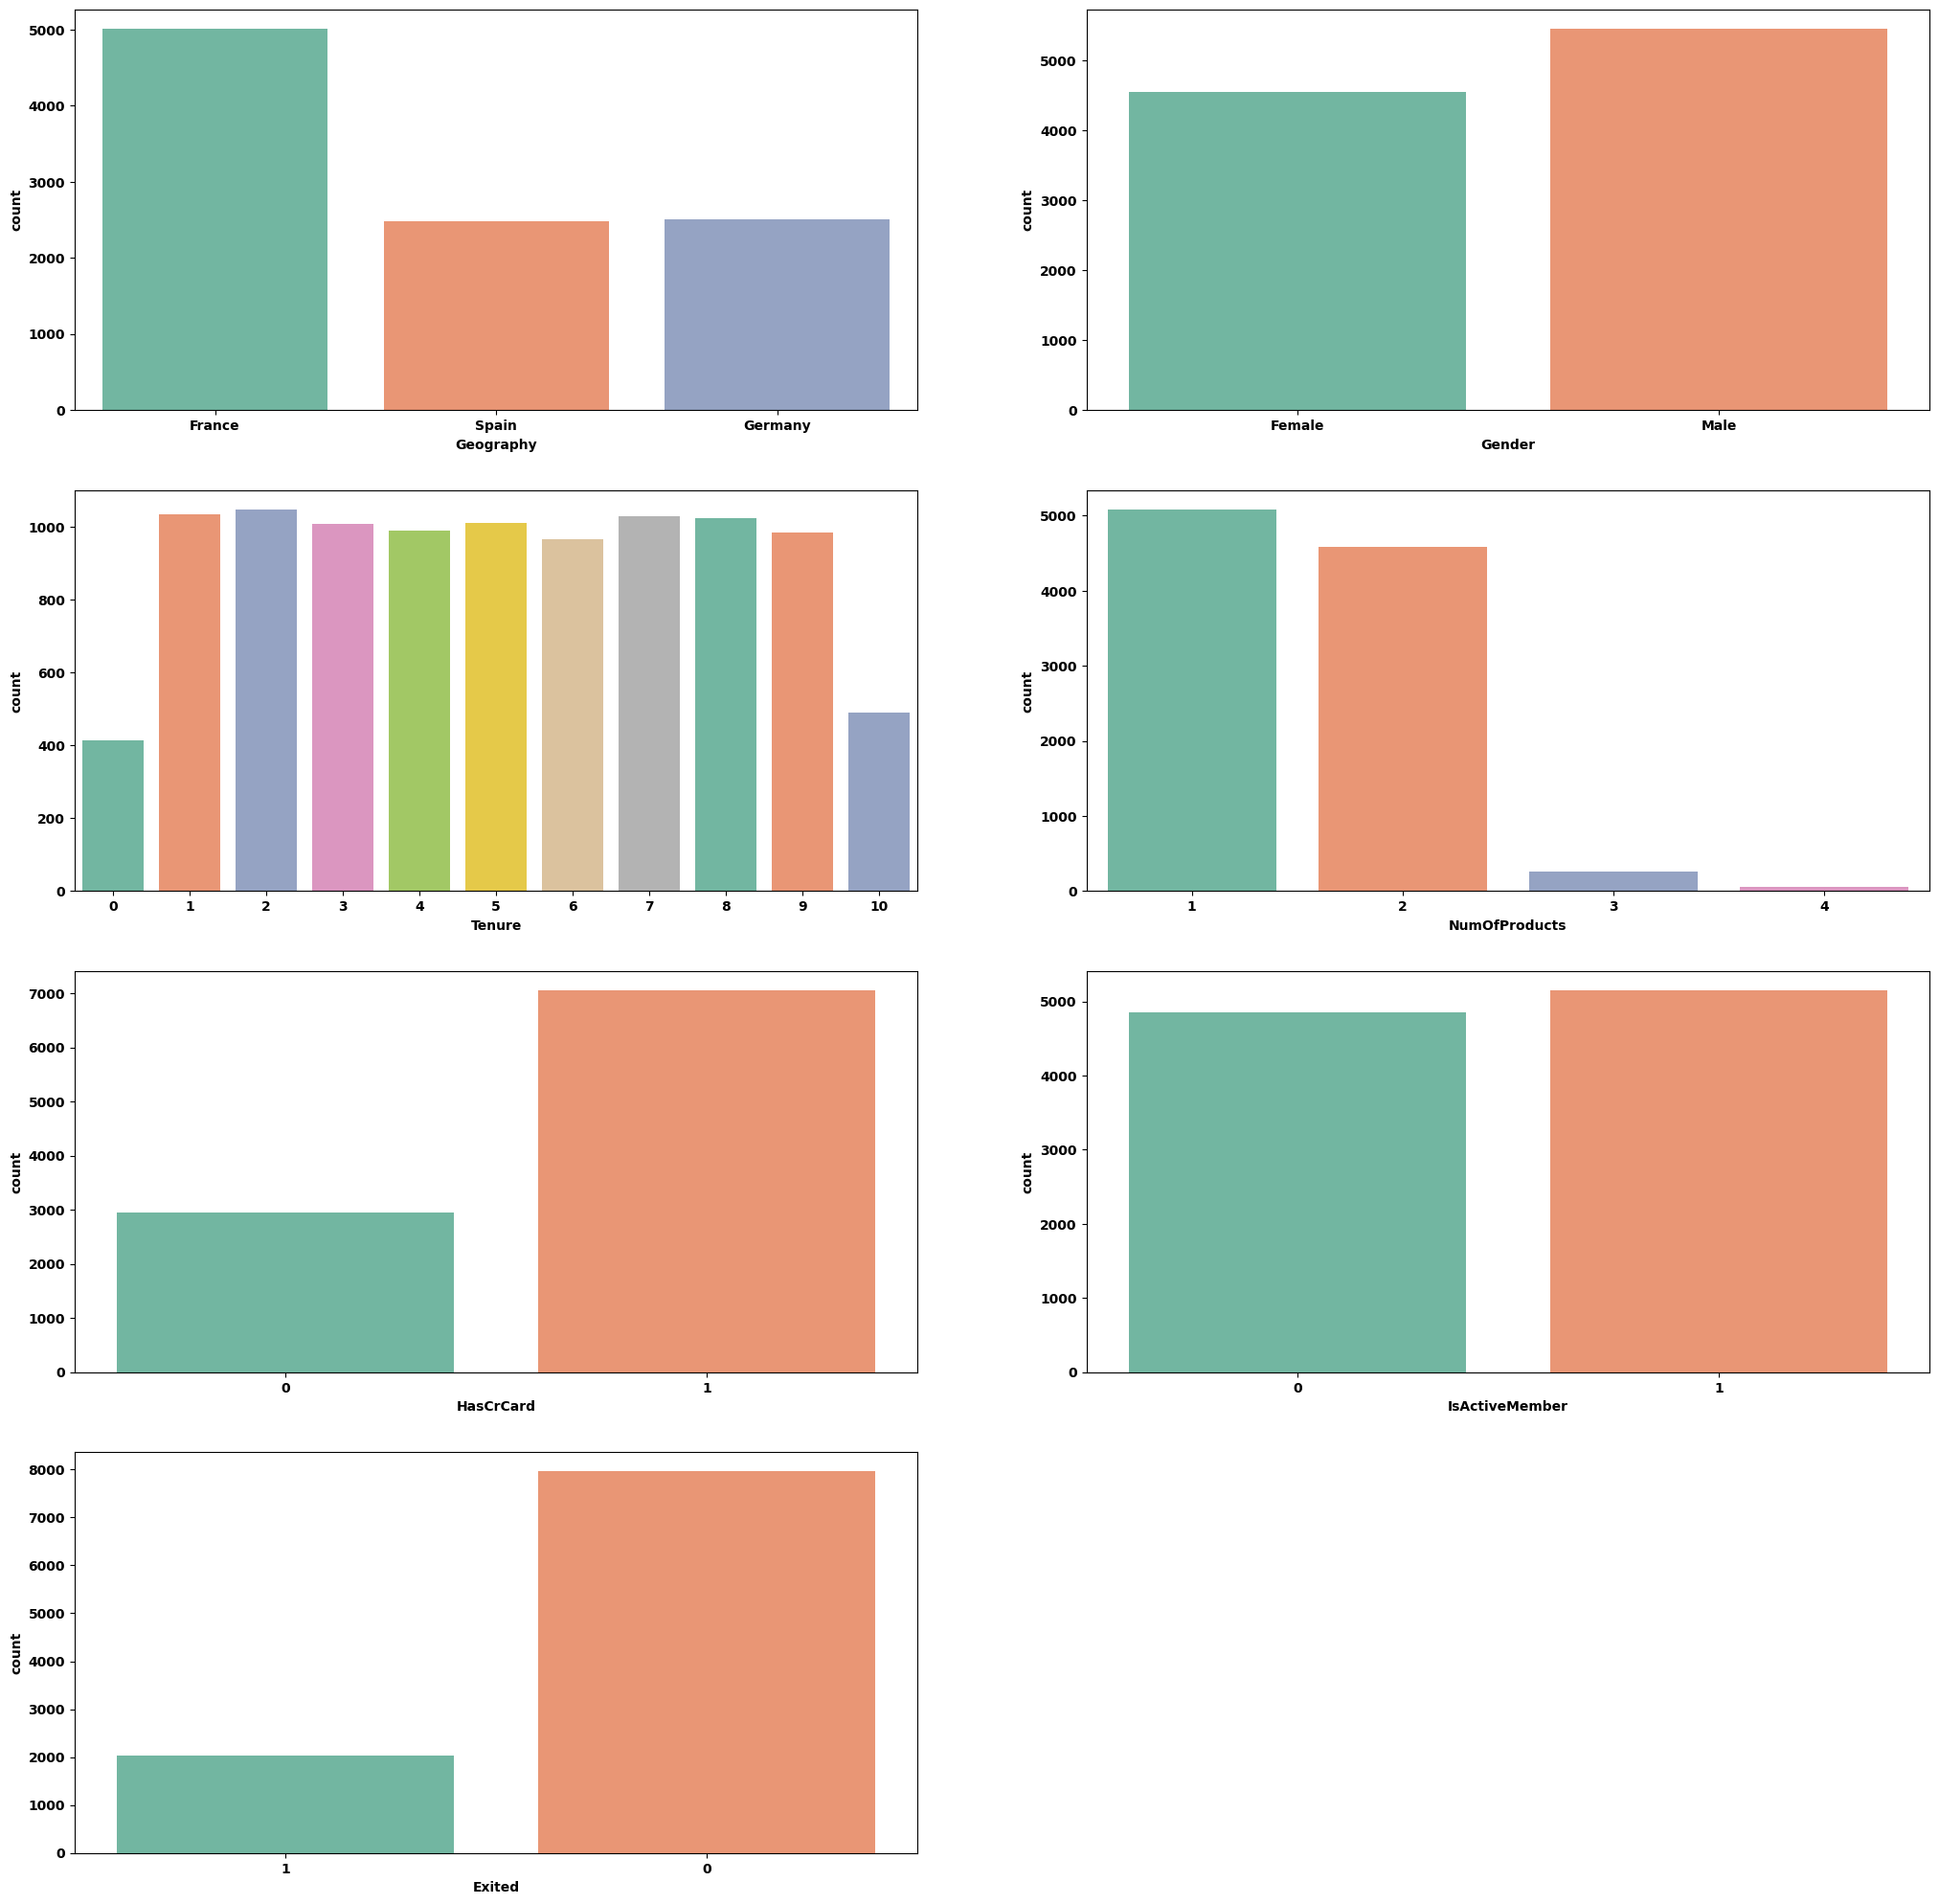

In [39]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'Geography', palette='Set2', data = data)

plt.subplot(4,2,2)
sns.countplot(x = 'Gender', palette='Set2', data = data)

plt.subplot(4,2,3)
sns.countplot(x = 'Tenure', palette='Set2', data = data)

plt.subplot(4,2,4)
sns.countplot(x = 'NumOfProducts', palette='Set2', data = data)

plt.subplot(4,2,5)
sns.countplot(x = 'HasCrCard', palette='Set2', data = data)

plt.subplot(4,2,6)
sns.countplot(x = 'IsActiveMember', palette='Set2', data = data)



plt.subplot(4,2,7)
sns.countplot(x = 'Exited', palette='Set2', data = data)


In [40]:
### Bvariate Analysis

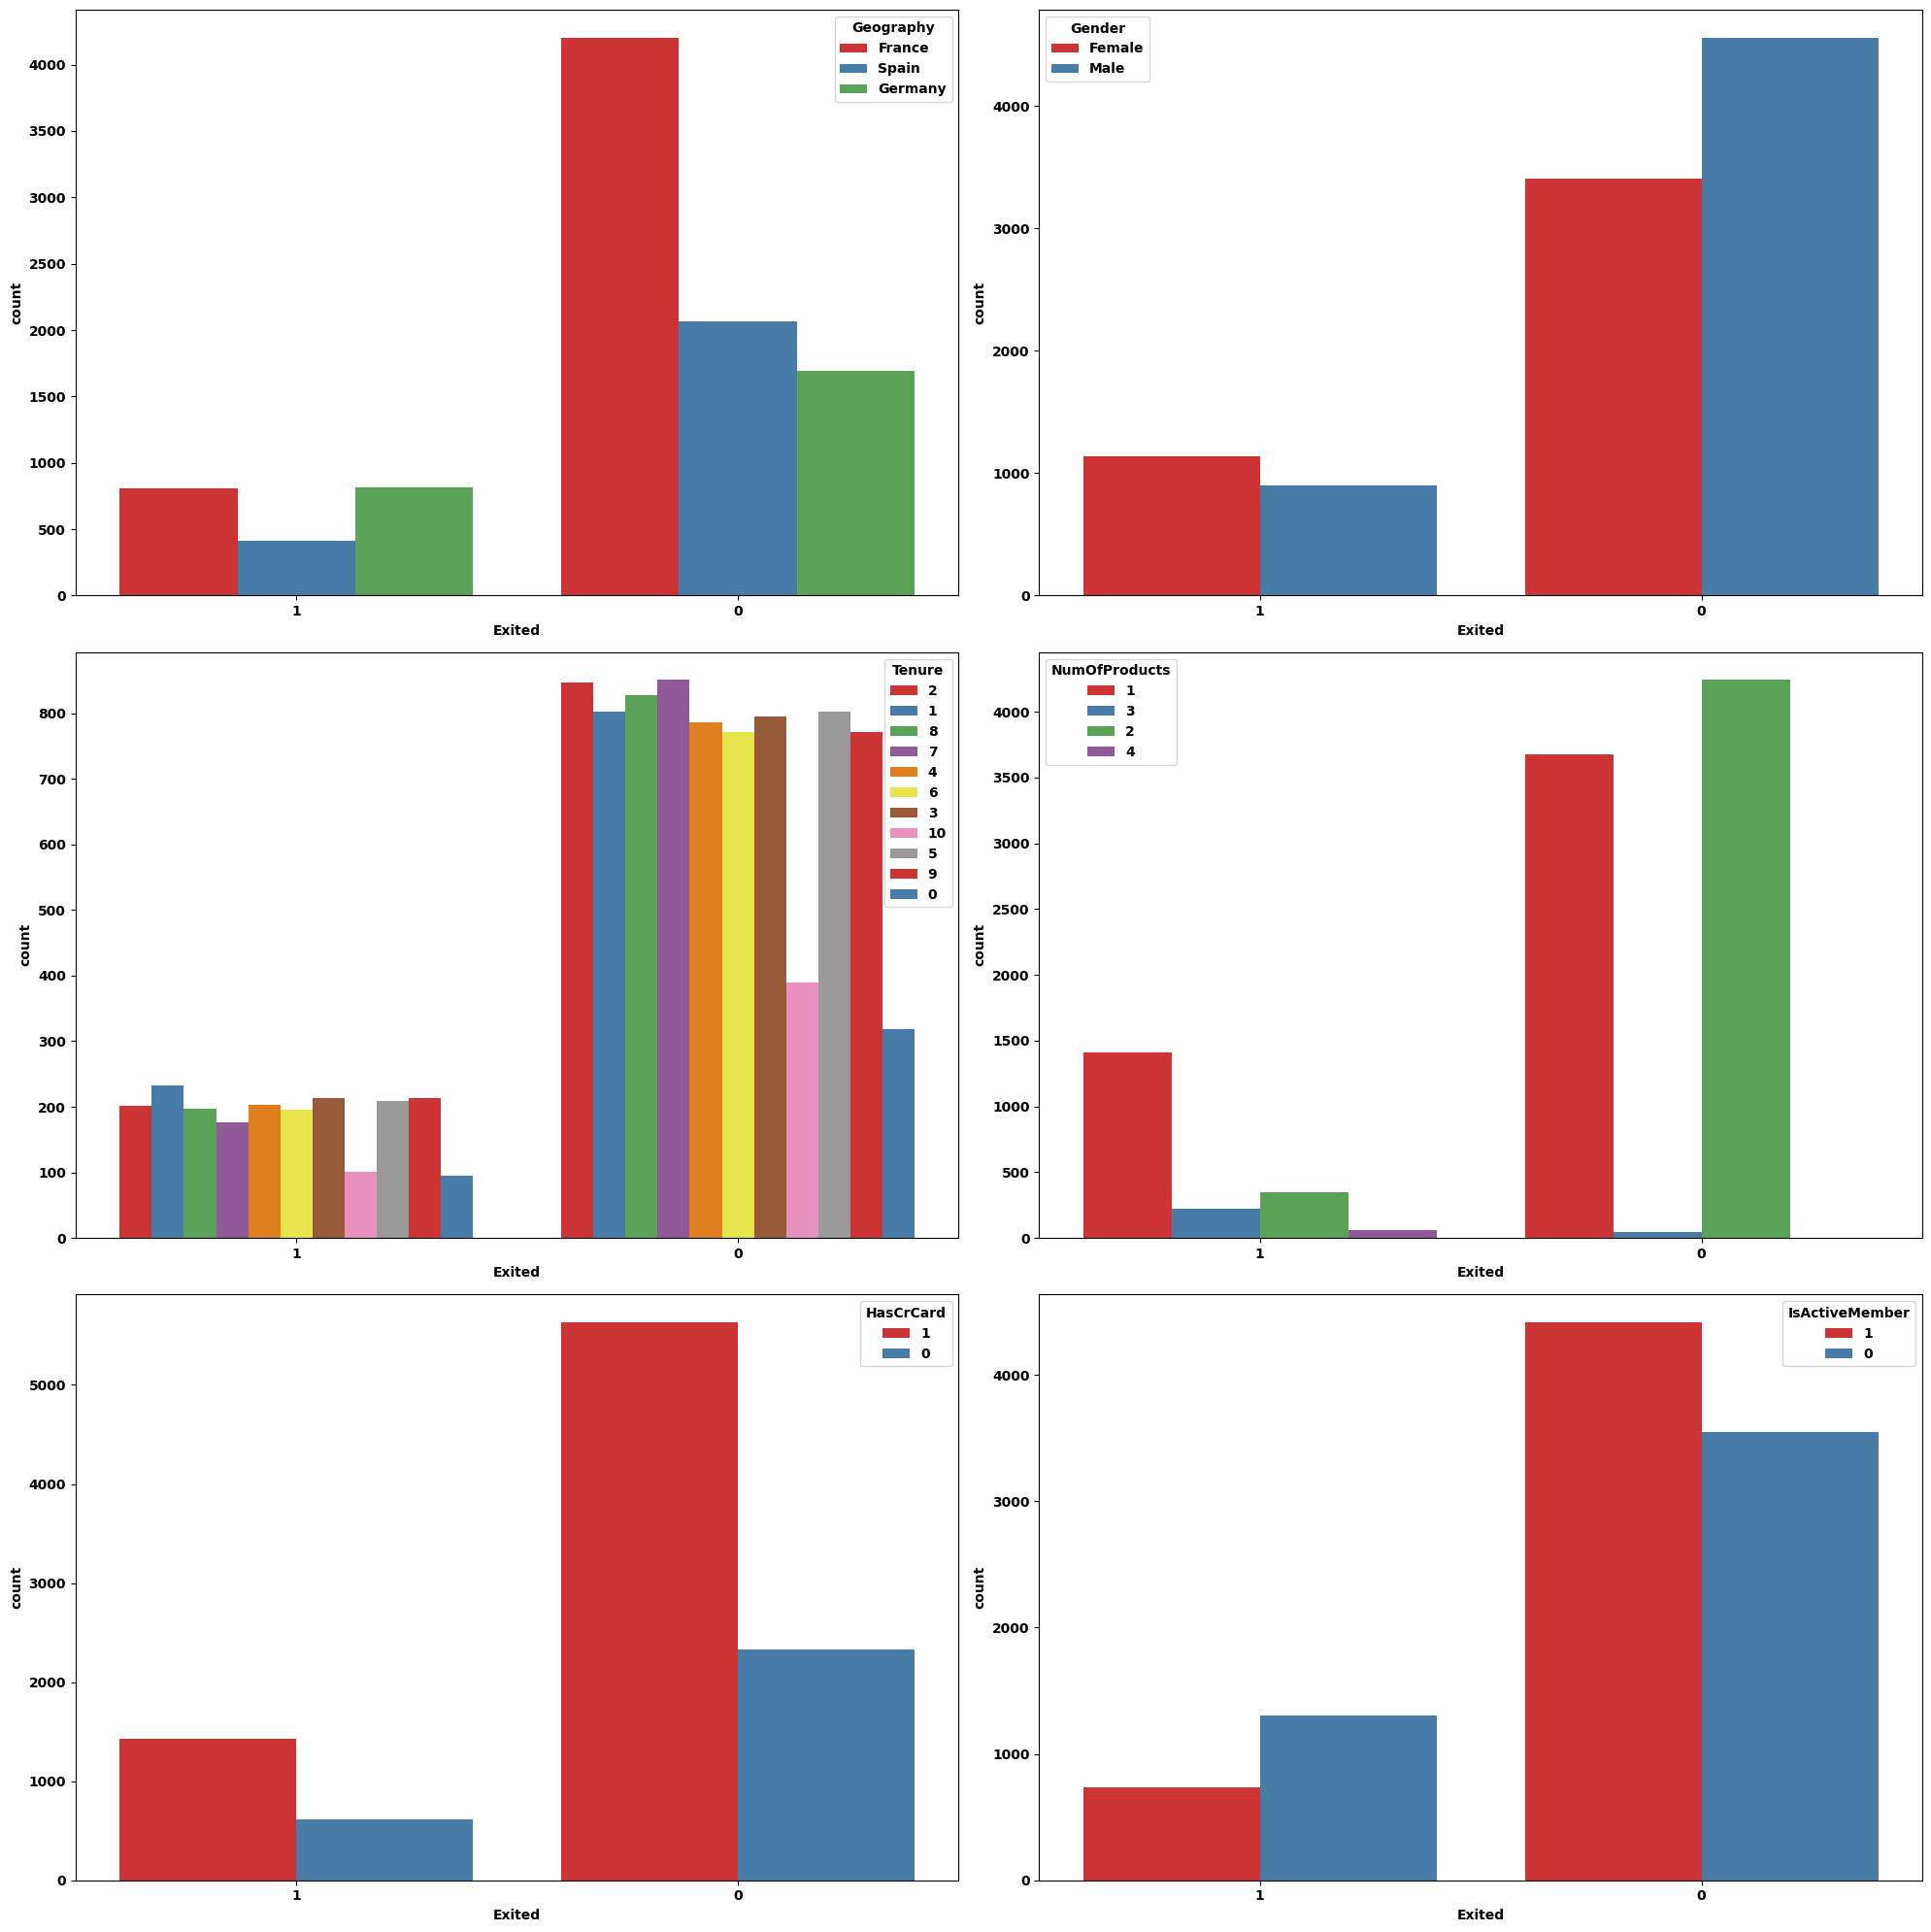

In [41]:


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Convert relevant columns to string to avoid AttributeError
data['Geography'] = data['Geography'].astype(str)
data['Gender'] = data['Gender'].astype(str)
data['Tenure'] = data['Tenure'].astype(str)
data['NumOfProducts'] = data['NumOfProducts'].astype(str)
data['HasCrCard'] = data['HasCrCard'].astype(str)
data['IsActiveMember'] = data['IsActiveMember'].astype(str)
data['Exited'] = data['Exited'].astype(str)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.countplot(x='Exited', hue='Geography', palette='Set1', data=data)

plt.subplot(3, 2, 2)
sns.countplot(x='Exited', hue='Gender', palette='Set1', data=data)

plt.subplot(3, 2, 3)
sns.countplot(x='Exited', hue='Tenure', palette='Set1', data=data)

plt.subplot(3, 2, 4)
sns.countplot(x='Exited', hue='NumOfProducts', palette='Set1', data=data)

plt.subplot(3, 2, 5)
sns.countplot(x='Exited', hue='HasCrCard', palette='Set1', data=data)

plt.subplot(3, 2, 6)
sns.countplot(x='Exited', hue='IsActiveMember', palette='Set1', data=data)

plt.tight_layout()
plt.show()


In [42]:
# Customers with zero balances are not churning. \ Churn rates increase among customers after the age of 50. \
# Estimated salary of customers does not significantly influence their likelihood to churn

In [43]:
from powerbiclient import Report, models

In [44]:
#import libraries
from powerbiclient import Report, models, authentication
from powerbiclient.authentication import InteractiveLoginAuthentication


In [45]:
# Authenticate to Power BI service using InteractiveLoginAuthentication
auth = authentication.InteractiveLoginAuthentication()

A local browser window will open for interactive sign in.

Interactive authentication successfully completed.
You are now logged in.

The result should be passed only to trusted code in your notebook.


In [46]:
#pip install IPython ipywidgets

In [47]:
from IPython.display import IFrame

# Replace the URL with your actual Embed URL from Power BI
embed_url = "https://app.powerbi.com/reportEmbed?reportId=32803f8e-05d1-47a5-a27a-5cc1d2b86264&autoAuth=true&ctid=840f859c-9de6-42e1-bb24-49ee394e5505"

# Define the width and height for the embedded report
width = 800
height = 600

# Embed the Power BI report in an iframe
IFrame(embed_url, width=width, height=height)

In [48]:
## Next step: making range for Balance

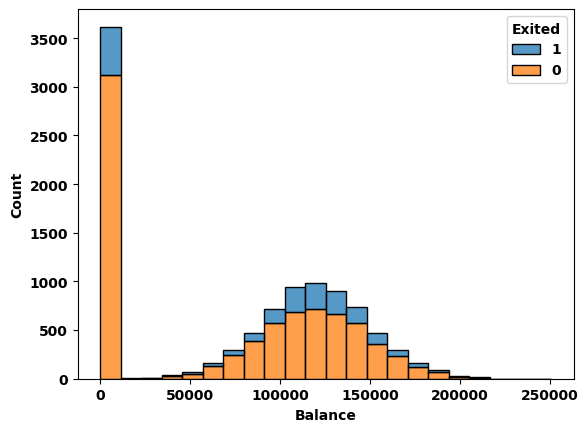

In [49]:
sns.histplot(data=data, x='Balance', hue='Exited', multiple="stack");

In [50]:
data['Balance'].max()

250898.09

In [51]:
data['Balance_range'] = pd.cut(data['Balance'], [0,50000,100000,150000,200000,250100], 
                           labels=['0-50000','50000-100000', '100001-150000', '150001-200000', '200001-250100'])

In [52]:
data['Balance_range'].unique()

[NaN, '50000-100000', '150001-200000', '100001-150000', '0-50000', '200001-250100']
Categories (5, object): ['0-50000' < '50000-100000' < '100001-150000' < '150001-200000' < '200001-250100']

In [53]:
data.isnull().sum().sum()

3618

<Axes: xlabel='Balance_range', ylabel='count'>

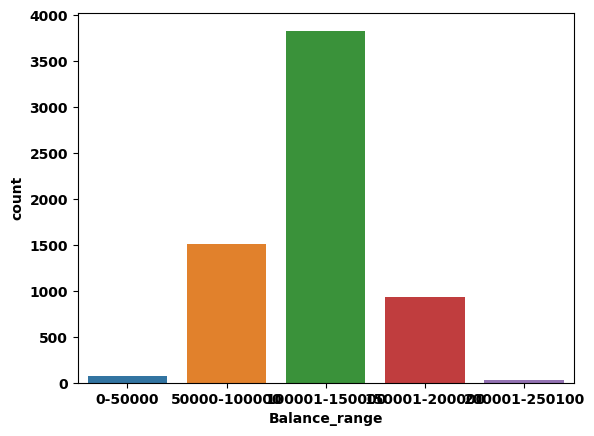

In [54]:
sns.countplot(data=data, x='Balance_range')

In [55]:
balance =[(data['Balance']==0), (data['Balance']>0)]
bal_values = ['Zero $', 'More than Zero $']
data['Balance'] = np.select(balance,bal_values)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_range,Balance_range
0,1,15634602,Hargrave,619,France,Female,42,2,Zero $,1,1,1,101348.88,1,36-45,NaN
1,2,15647311,Hill,608,Spain,Female,41,1,More than Zero $,1,0,1,112542.58,0,36-45,50000-100000
2,3,15619304,Onio,502,France,Female,42,8,More than Zero $,3,1,0,113931.57,1,36-45,150001-200000
3,4,15701354,Boni,699,France,Female,39,1,Zero $,2,0,0,93826.63,0,36-45,NaN
4,5,15737888,Mitchell,850,Spain,Female,43,2,More than Zero $,1,1,1,79084.10,0,36-45,100001-150000


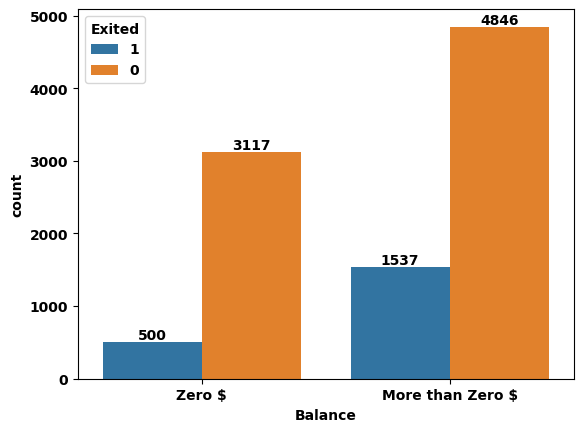

In [56]:
# This plot shows the customers with money in their account churned more than the customers with zero balance

balance_exit= sns.countplot(data=data, x='Balance', hue='Exited');
balance_exit.bar_label(balance_exit.containers[0]);
balance_exit.bar_label(balance_exit.containers[1]);

In [57]:
# If we want to train our model based on the Balance feature, we need to make the data balance(our data are imbalanced)

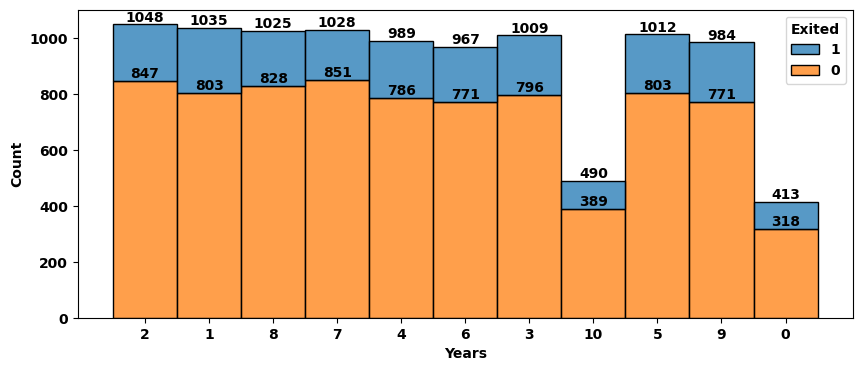

In [58]:
#This code displays the number of years customers have been with the bank as well as customers who exited in each period.
plt.figure(figsize=(10,4))
tenure_exit_plot=sns.histplot(data=data, x='Tenure', hue='Exited', multiple="stack");
tenure_exit_plot.bar_label(tenure_exit_plot.containers[0]);
tenure_exit_plot.bar_label(tenure_exit_plot.containers[1]);
plt.xlabel('Years');

[Text(0, 0, '5084'), Text(0, 0, '266'), Text(0, 0, '4590'), Text(0, 0, '60')]

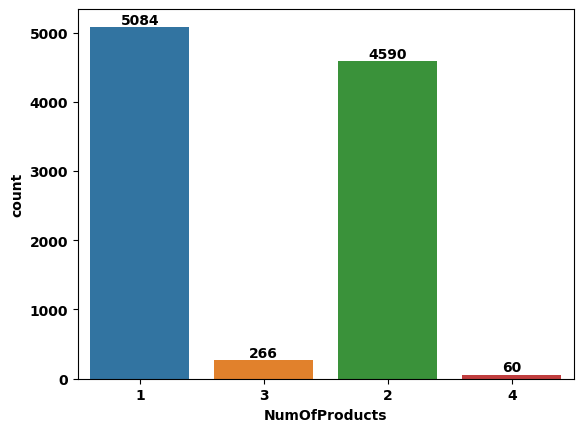

In [59]:
# This plot shows the distribution of people with the number of products they use.
n_product = sns.countplot(data=data, x='NumOfProducts');
n_product.bar_label(n_product.containers[0])

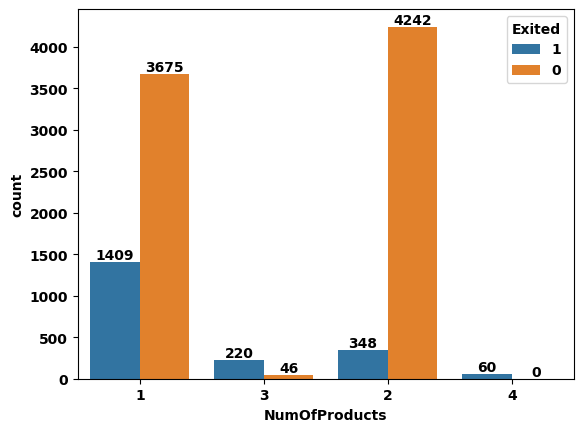

In [60]:
# With this plot, we can understand the relation between the number of products and exited customers.

n_product_ex= sns.countplot(data=data, x='NumOfProducts', hue='Exited');
n_product_ex.bar_label(n_product_ex.containers[0]);
n_product_ex.bar_label(n_product_ex.containers[1]);

In [61]:
# As you can see, most Exited Customers used one or two products.

In [62]:

# Check the columns of the DataFrame
print("Columns in DataFrame:", data.columns)

# Ensure 'NumOfProducts' column exists and has the correct name
if 'NumOfProducts' in data.columns:
    # Convert 'NumOfProducts' to numeric type
    data['NumOfProducts'] = pd.to_numeric(data['NumOfProducts'], errors='coerce')

    # Original code to create n_product_range and assign values
    n_product_range = [(data['NumOfProducts'] == 1), (data['NumOfProducts'] == 2), (data['NumOfProducts'] > 2)]
    values = ["One product", "Two Products", "More Than 2"]

    data["n_product_range"] = np.select(n_product_range, values)
    print(data.head())
else:
    print("Column 'NumOfProducts' not found in DataFrame.")


Columns in DataFrame: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_range',
       'Balance_range'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age Tenure  \
0          1    15634602  Hargrave          619    France  Female   42      2   
1          2    15647311      Hill          608     Spain  Female   41      1   
2          3    15619304      Onio          502    France  Female   42      8   
3          4    15701354      Boni          699    France  Female   39      1   
4          5    15737888  Mitchell          850     Spain  Female   43      2   

            Balance  NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0            Zero $              1         1              1        101348.88   
1  More than Zero $              1         0              1        11

In [63]:
# Let's drop usless columns 
data = data.drop(columns=['Surname', 'CustomerId', 'RowNumber', 'NumOfProducts', 'Age'])
data.head()

,CreditScore,Geography,Gender,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_range,Balance_range,n_product_range
0,619,France,Female,2,Zero $,1,1,101348.88,1,36-45,NaN,One product
1,608,Spain,Female,1,More than Zero $,0,1,112542.58,0,36-45,50000-100000,One product
2,502,France,Female,8,More than Zero $,1,0,113931.57,1,36-45,150001-200000,More Than 2
3,699,France,Female,1,Zero $,0,0,93826.63,0,36-45,NaN,Two Products
4,850,Spain,Female,2,More than Zero $,1,1,79084.10,0,36-45,100001-150000,One product


In [64]:
# I use get_dummies from Pandas libraries to make data categorical.
cat_data = ['Geography', 'Gender', 'Age_range', 'Balance', 'n_product_range']

data = pd.get_dummies(data=data, columns=cat_data)

In [65]:
data.describe()

,CreditScore,EstimatedSalary
count,10000.00,10000.00
mean,650.53,100090.24
std,96.65,57510.49
min,350.00,11.58
25%,584.00,51002.11
50%,652.00,100193.91
75%,718.00,149388.25
max,850.00,199992.48


In [66]:
#Scale

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder

In [68]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Geography', 'Gender', 'Age_range', 'n_product_range']

# Apply LabelEncoder to each specified column
for column in columns_to_encode:
    if column in data.columns:
        if data[column].isnull().sum() == 0:  # Check for missing values
            data[column] = le.fit_transform(data[column])
        else:
            print(f"Column {column} contains missing values.")
    else:
        print(f"Column {column} does not exist in the DataFrame.")

# Display information about the dataframe
data.info()


Column Geography does not exist in the DataFrame.
Column Gender does not exist in the DataFrame.
Column Age_range does not exist in the DataFrame.
Column n_product_range does not exist in the DataFrame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   CreditScore                   10000 non-null  int64   
 1   Tenure                        10000 non-null  object  
 2   HasCrCard                     10000 non-null  object  
 3   IsActiveMember                10000 non-null  object  
 4   EstimatedSalary               10000 non-null  float64 
 5   Exited                        10000 non-null  object  
 6   Balance_range                 6382 non-null   category
 7   Geography_France              10000 non-null  bool    
 8   Geography_Germany             10000 non-null  bool    
 9   Geography_Spain         

In [69]:
cat_data = ['Geography', 'Gender', 'Age_range', 'Balance', 'n_product_range']

In [70]:
data.describe()

,CreditScore,EstimatedSalary
count,10000.00,10000.00
mean,650.53,100090.24
std,96.65,57510.49
min,350.00,11.58
25%,584.00,51002.11
50%,652.00,100193.91
75%,718.00,149388.25
max,850.00,199992.48


In [71]:
data['CreditScore'] = MinMaxScaler().fit_transform(data[['CreditScore']])
data['EstimatedSalary'] = MinMaxScaler().fit_transform(data[['EstimatedSalary']])
data['Tenure'] = MinMaxScaler().fit_transform(data[['Tenure']])

data.describe()

,CreditScore,Tenure,EstimatedSalary
count,10000.00,10000.00,10000.00
mean,0.60,0.50,0.50
std,0.19,0.29,0.29
min,0.00,0.00,0.00
25%,0.47,0.30,0.25
50%,0.60,0.50,0.50
75%,0.74,0.70,0.75
max,1.00,1.00,1.00


In [72]:
## Split the dataset to X and y

In [73]:
from sklearn.model_selection import train_test_split
X = data.drop(columns =['Exited'])
y = data['Exited']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
print(X_train.head())
print(y_train.head())
print(X_train.shape, y_train.shape)
print('')
print(X_test.shape, y_test.shape)

      CreditScore  Tenure HasCrCard IsActiveMember  EstimatedSalary  \
4792         0.81    0.40         1              1             0.67   
8854         0.65    0.60         1              1             0.05   
6250         0.52    1.00         1              0             0.19   
5936         0.48    0.90         1              1             0.82   
425          0.60    0.90         1              0             0.49   

      Balance_range  Geography_France  Geography_Germany  Geography_Spain  \
4792  100001-150000             False              False             True   
8854            NaN             False              False             True   
6250  150001-200000              True              False            False   
5936   50000-100000             False              False             True   
425   150001-200000              True              False            False   

      Gender_Female  ...  Age_range_36-45  Age_range_46-55  Age_range_56-65  \
4792          False  ...       

In [75]:
## Now the data is Balance

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier 

In [77]:
# Balancing the data¶
#Customers who do not churn rate are only about 20% Hence, we need to use the Over sampling method on this data
# to make it Balance.

In [78]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [79]:
# RandomOverSampler

In [80]:
X_train_ROS, y_train_ROS = RandomOverSampler(random_state = 42).fit_resample(X_train, y_train)
print(X_train_ROS.shape, y_train_ROS.shape)

(10320, 23) (10320,)


In [81]:
print('Imbalance data value:\n\n ',y_train.value_counts().to_frame())
print('-'*25)
print('Balance data value: \n\n', y_train_ROS.value_counts().to_frame())
print('-'*25)

Imbalance data value:

          count
Exited       
0        5160
1        1340
-------------------------
Balance data value: 

         count
Exited       
0        5160
1        5160
-------------------------


In [82]:
#With Balance data (RandomOverSampler)
from sklearn.tree import DecisionTreeClassifier  as DT
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame
data = pd.read_csv('bank churn.csv')

# Display first few rows of the dataset to verify loading
data.head()

# Replace missing values for numerical columns with mean
# and for categorical columns with mode
for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

# Define the steps of the pipeline
steps_dt_SMOTE = [('Scaler', MinMaxScaler()),
                  ('clf', DT(random_state=42, max_depth=8, min_samples_split=7, splitter='random'))]

# Create the pipeline
clf_dt_SMOTE = Pipeline(steps=steps_dt_SMOTE)

# Fit the pipeline on the training data
clf_dt_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict on the test data
y_pred_dt_SMOTE = clf_dt_SMOTE.predict(X_test)

# Evaluate the model
print('DT Accuracy_SMOTE:', accuracy_score(y_true=y_test, y_pred=y_pred_dt_SMOTE) * 100)
print('-' * 40)
print('DT Precision_SMOTE:', precision_score(y_true=y_test, y_pred=y_pred_dt_SMOTE, average='binary') * 100)
print('-' * 40)
print('DT Recall_SMOTE:', recall_score(y_true=y_test, y_pred=y_pred_dt_SMOTE, average='binary') * 100)
print('-' * 40)
print('DT F1-Score_SMOTE:', f1_score(y_true=y_test, y_pred=y_pred_dt_SMOTE, average='binary') * 100)



DT Accuracy_SMOTE: 78.64999999999999
----------------------------------------
DT Precision_SMOTE: 46.909090909090914
----------------------------------------
DT Recall_SMOTE: 65.64885496183206
----------------------------------------
DT F1-Score_SMOTE: 54.718981972428416


In [83]:

# Load your dataset
data = pd.read_csv('bank churn.csv')

# Display first few rows of the dataset to verify loading
data.head()

# Replace missing values for numerical columns with mean
# and for categorical columns with mode
for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

# Encode categorical columns
label_encoders = {}
for column in ['Geography', 'Gender', 'Age_range', 'n_product_range']:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Assuming the target column is named 'target'
target_column = 'target'  # Update this with the actual target column name

# Check if target_column exists in the DataFrame
if target_column not in data.columns:
    print(f"Error: Target column '{target_column}' not found in the dataset.")
else:
    # Split the data into features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

    # Define the steps of the pipeline
    steps_dt_SMOTE = [('Scaler', MinMaxScaler()),
                      ('clf', DT(random_state=42, max_depth=8, min_samples_split=7, splitter='random'))]

    # Create the pipeline
    clf_dt_SMOTE = Pipeline(steps=steps_dt_SMOTE)

    # Fit the pipeline on the training data
    clf_dt_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

    # Predict on the test data
    y_pred_dt_SMOTE = clf_dt_SMOTE.predict(X_test)

    # Evaluate the model
    print('DT Accuracy_SMOTE:', accuracy_score(y_true=y_test, y_pred=y_pred_dt_SMOTE) * 100)
    print('-' * 40)
    print('DT Precision_SMOTE:', precision_score(y_true=y_test, y_pred=y_pred_dt_SMOTE) * 100)
    print('-' * 40)
    print('DT Recall_SMOTE:', recall_score(y_true=y_test, y_pred=y_pred_dt_SMOTE) * 100)
    print('-' * 40)
    print('DT F1-Score_SMOTE:', f1_score(y_true=y_test, y_pred=y_pred_dt_SMOTE) * 100)


Error: Target column 'target' not found in the dataset.


In [84]:
## RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier
rf = RandomForestClassifier()

# Create a dictionary of hyperparameters to tune
params = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Create a grid search object
gscv = GridSearchCV(rf, params, scoring='accuracy', cv=5)

# Fit the grid search object to the training data
gscv.fit(X_train, y_train)

# Print the best parameters
print(gscv.best_params_)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [86]:
#Imbalance data
steps_rf = [('Scaler', MinMaxScaler()),
            ('clf', RFC(n_estimators=100,max_depth=10, min_samples_split=10,))]


clf_rf = Pipeline(steps=steps_rf)
steps_rf = Pipeline(steps=steps_rf)


steps_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
print('RF Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_rf)*100)
print('-'*40)
print('RF precision_score:', precision_score(y_true=y_test, y_pred=y_pred_rf)*100)
print('-'*40)
print('RF recall_score:', recall_score(y_true=y_test, y_pred=y_pred_rf)*100)
print('-'*40)
print('RF f1_score:', f1_score(y_true=y_test, y_pred=y_pred_rf)*100)


RF Accuracy: 86.15
----------------------------------------
RF precision_score: 80.85106382978722
----------------------------------------
RF recall_score: 38.67684478371501
----------------------------------------
RF f1_score: 52.3235800344234


In [87]:
#Balance data(SMOTE)
steps_rf_SMOTE = [('Scaler', MinMaxScaler()),
                  ('clf', RFC(n_estimators=100,max_depth=10, min_samples_split=10))]


clf_rf_SMOTE = Pipeline(steps=steps_rf_SMOTE)
steps_rf_SMOTE = Pipeline(steps=steps_rf_SMOTE)


steps_rf_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_rf_SMOTE = clf_rf_SMOTE.predict(X_test)
print('RF Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_rf_SMOTE)*100)
print('-'*40)
print('RF precision_score:', precision_score(y_true=y_test, y_pred=y_pred_rf_SMOTE)*100)
print('-'*40)
print('RF recall_score:', recall_score(y_true=y_test, y_pred=y_pred_rf_SMOTE)*100)
print('-'*40)
print('RF f1_score:', f1_score(y_true=y_test, y_pred=y_pred_rf_SMOTE)*100)

RF Accuracy: 81.5
----------------------------------------
RF precision_score: 52.27722772277228
----------------------------------------
RF recall_score: 67.17557251908397
----------------------------------------
RF f1_score: 58.79732739420936


In [88]:
# K-NN Algorithm
# for balnced dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'X_train_bal', 'X_test_bal', 'y_train_bal', 'y_test_bal' are obtained from data balancing techniques

# Initialize the KNN model
knn_bal = KNeighborsClassifier()

# Define the steps for the KNN pipeline
steps_knn_bal = [('Scaler', MinMaxScaler()), ('clf', knn_bal)]

# Create the pipeline
clf_knn_bal = Pipeline(steps=steps_knn_bal)

# Fit the pipeline on the balanced training data
clf_knn_bal.fit(X_train, y_train)
                # Predict on the balanced test data
y_pred_knn_bal = clf_knn_bal.predict(X_test)

# Evaluate the model
print('KNN (Balanced Data) Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_knn_bal))
print('KNN (Balanced Data) Precision:', precision_score(y_true=y_test, y_pred=y_pred_knn_bal, average='weighted'))
print('KNN (Balanced Data) Recall:', recall_score(y_true=y_test, y_pred=y_pred_knn_bal, average='weighted'))
print('KNN (Balanced Data) F1-score:', f1_score(y_true=y_test, y_pred=y_pred_knn_bal, average='weighted'))



KNN (Balanced Data) Accuracy: 0.8025
KNN (Balanced Data) Precision: 0.7658358253588518
KNN (Balanced Data) Recall: 0.8025
KNN (Balanced Data) F1-score: 0.7710852590282236


In [89]:
## for imbalanced data
# Assuming 'X_train_imbal', 'X_test_imbal', 'y_train_imbal', 'y_test_imbal' are the original (imbalanced) dataset

# Initialize the KNN model
knn_imbal = KNeighborsClassifier()

# Define the steps for the KNN pipeline
steps_knn_imbal = [('Scaler', MinMaxScaler()), ('clf', knn_imbal)]

# Create the pipeline
clf_knn_imbal = Pipeline(steps=steps_knn_imbal)

# Fit the pipeline on the original (imbalanced) training data
clf_knn_imbal.fit(X_train, y_train)

# Predict on the original (imbalanced) test data
y_pred_knn_imbal = clf_knn_imbal.predict(X_test)

# Evaluate the model
print('KNN (Imbalanced Data) Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_knn_imbal) * 100)
print('KNN (Imbalanced Data) Precision:', precision_score(y_true=y_test, y_pred=y_pred_knn_imbal, average='weighted') * 100)
print('KNN (Imbalanced Data) Recall:', recall_score(y_true=y_test, y_pred=y_pred_knn_imbal, average='weighted') * 100)
print('KNN (Imbalanced Data) F1-score:', f1_score(y_true=y_test, y_pred=y_pred_knn_imbal, average='weighted') * 100)


KNN (Imbalanced Data) Accuracy: 80.25
KNN (Imbalanced Data) Precision: 76.58358253588517
KNN (Imbalanced Data) Recall: 80.25
KNN (Imbalanced Data) F1-score: 77.10852590282235


In [90]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'X_train_bal', 'X_test_bal', 'y_train_bal', 'y_test_bal' are obtained from data balancing techniques

# Initialize the Logistic Regression model
log_reg_bal = LogisticRegression()

# Define the steps for the Logistic Regression pipeline
steps_log_reg_bal = [('Scaler', MinMaxScaler()), ('clf', log_reg_bal)]

# Create the pipeline
clf_log_reg_bal = Pipeline(steps=steps_log_reg_bal)

# Fit the pipeline on the balanced training data
clf_log_reg_bal.fit(X_train, y_train)

# Predict on the balanced test data
y_pred_log_reg_bal = clf_log_reg_bal.predict(X_test)

# Evaluate the model
print('Logistic Regression (Balanced Data) Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_log_reg_bal) * 100)
print('Logistic Regression (Balanced Data) Precision:', precision_score(y_true=y_test, y_pred=y_pred_log_reg_bal, average='weighted') * 100)
print('Logistic Regression (Balanced Data) Recall:', recall_score(y_true=y_test, y_pred=y_pred_log_reg_bal, average='weighted') * 100)
print('Logistic Regression (Balanced Data) F1-score:', f1_score(y_true=y_test, y_pred=y_pred_log_reg_bal, average='weighted') * 100)


Logistic Regression (Balanced Data) Accuracy: 81.35
Logistic Regression (Balanced Data) Precision: 78.01702501202502
Logistic Regression (Balanced Data) Recall: 81.35
Logistic Regression (Balanced Data) F1-score: 76.85816851820164


In [91]:
# Assuming 'X_train_imbal', 'X_test_imbal', 'y_train_imbal', 'y_test_imbal' are the original (imbalanced) dataset

# Initialize the Logistic Regression model
log_reg_imbal = LogisticRegression()

# Define the steps for the Logistic Regression pipeline
steps_log_reg_imbal = [('Scaler', MinMaxScaler()), ('clf', log_reg_imbal)]

# Create the pipeline
clf_log_reg_imbal = Pipeline(steps=steps_log_reg_imbal)

# Fit the pipeline on the original (imbalanced) training data
clf_log_reg_imbal.fit(X_train, y_train)

# Predict on the original (imbalanced) test data
y_pred_log_reg_imbal = clf_log_reg_imbal.predict(X_test)

# Evaluate the model
print('Logistic Regression (Imbalanced Data) Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_log_reg_imbal) * 100)
print('Logistic Regression (Imbalanced Data) Precision:', precision_score(y_true=y_test, y_pred=y_pred_log_reg_imbal, average='weighted') * 100)
print('Logistic Regression (Imbalanced Data) Recall:', recall_score(y_true=y_test, y_pred=y_pred_log_reg_imbal, average='weighted') * 100)
print('Logistic Regression (Imbalanced Data) F1-score:', f1_score(y_true=y_test, y_pred=y_pred_log_reg_imbal, average='weighted') * 100)


Logistic Regression (Imbalanced Data) Accuracy: 81.35
Logistic Regression (Imbalanced Data) Precision: 78.01702501202502
Logistic Regression (Imbalanced Data) Recall: 81.35
Logistic Regression (Imbalanced Data) F1-score: 76.85816851820164


In [92]:
#Data Pre-Processing:
#We will first convert the categorical features into numerical to apply models efficiently. 
#We will do this with help of LabelEncoder. Then we apply LazyClassifier,
#and compare every model based on the Time Taken and Accuracy of each model.

In [93]:
#Convering Categorical Features into numerical features using LabelEncoder
data['Geography'] = LabelEncoder().fit_transform(data['Geography'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [94]:
X = data.copy()
X.drop('Exited', axis=1, inplace=True)
y = data['Exited']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Proceed with the original train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [95]:
## Model Implementation 

In [96]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [13:51<00:31, 31.59s/it]

[LightGBM] [Info] Number of positive: 1632, number of negative: 6368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204000 -> initscore=-1.361479
[LightGBM] [Info] Start training from score -1.361479


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [13:55<00:00, 28.82s/it]


In [97]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.86               0.74     0.74      0.85   
AdaBoostClassifier                 0.86               0.74     0.74      0.85   
LGBMClassifier                     0.86               0.73     0.73      0.85   
DecisionTreeClassifier             0.82               0.71     0.71      0.82   
BaggingClassifier                  0.85               0.71     0.71      0.84   
RandomForestClassifier             0.86               0.68     0.68      0.84   
ExtraTreesClassifier               0.85               0.65     0.65      0.82   
NearestCentroid                    0.72               0.60     0.60      0.73   
ExtraTreeClassifier                0.77               0.60     0.60      0.75   
LinearSVC                          0.75               0.56     0.56      0.73   
LogisticRegression          

In [98]:
# Accuracy Vs Model:
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model'})

line.show()

In [99]:
# Time Taken Vs Model:
models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,
    title = {
        'text': 'Time Taken Vs Model'})

line.show()